# Basic Oscillator to test numerical schemes

Staring with a very simple oscillator to test the accuracy and robustness of our numerical schemes before applying them to more complex problems.

$$
\frac{dv}{dt} = - x
$$
$$
\frac{dx}{dt} = v
$$

Spring constant = 1

Energy is a conserved quantity

$$
E = x^2 + v^2
$$

In [4]:
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})
from IPython.core.display import HTML
HTML( open('my_css.css').read() )

In [5]:
##Define the equations as functions for use in the program

def func_dvdt(x):       #dv/dt = -x
    return -x
def func_dxdt(v):       #dx/dt = v
    return v
def func_ddt(q):
    return np.array([q[1],-q[0]])
def func_nrgCons(x,v):    #E = x^2 + v^2
    nrgConsVal = (x**2 + v**2)
    return nrgConsVal

# Schemes:

### 1st Order : Euler Forwards

$$\phi_{n+1} = \phi_n + \Delta t_a f(\phi_n)$$

### 1st Order : Forwards-Backwards

$$\phi_{n+1} = \phi_n + \Delta t_a f(\phi_n + \Delta t_a f(\phi_n))$$

### 2nd Order : Leapfrog

$$\phi_{n+1} = \frac{1}{\Delta t_b^2}(\Delta t_a^2 \phi_{n-1} - \phi_n(\Delta t_a^2 - \Delta t_b^2) + f(\phi_n)\Delta t_a \Delta t_b (\Delta t_a + \Delta t_b))$$

### 4th Order : Runge - Kutta (4-step explicit)

$$\phi_{n+1} = \phi_n + \frac{(\Delta t_a f(\phi_n) + 2\Delta t_a f(\phi_n + \frac{\Delta t_a f(\phi_n)}{2}) + 2\Delta t_a f(\phi_n + \frac{\Delta t_a f(\phi_n + \frac{\Delta t_a f(\phi_n)}{2})}{2}) + \Delta t_a f(\phi_n + \Delta t_a f(\phi_n + \frac{\Delta t_a f(\phi_n + \frac{\Delta t_a f(\phi_n)}{2})}{2}))}{6}$$

$\phi$ will be represented by q in the code below (q = quantity)

$\Delta t_a$ is the time step between $\phi_n$ and $\phi_{n+1}$

$\Delta t_b$ is the time step between $\phi_{n-1}$ and $\phi_n$

Leapfrog is the only scheme that needs to keep track of both the current and previous time steps

In [6]:
# dqdt is a list of the stored time derivatives for q, stored in order from present to the past
#ie. f(q_n) = dqdt[0] ; f(q_n-1) = dqdt[1] ;...

#phi_... = q, delta t = dt, f(...) = dqdt[...]

#q is either x or v

###Euler Forwards
def euler1(q,dt,func):
    return np.array(q + dt*func(q))

###Forwards-Backwards
def forback(q,dt,func): 
    return np.array(q + dt*func(q+dt*func(q)))
    
###Leapfrog
#Since leapfrog uses q_(n-1), we need to use a different scheme for the first time step as there is no q_(n-1)
#In this case we use the Euler Forwards scheme    
def leapfrog(qold,qmid,dtmid,dtold,func):
    l1 = (dtmid**2)*qold
    l2 = qmid*(dtmid**2 - dtold**2)
    l3 = (dtmid*dtold*(dtmid+dtold))
    l4 = 1/(dtold**2)
    return np.array(l4*(l1 - l2 + l3*func(qmid)))

###Adams Bashforth --- UNUSED FOR VARIABLE DUE TO COMPLEXITY IN REDERIVATION  
#Since 3rd order Adams Bashforth uses dqdt_(n-1) and dqdt(n-2), we need to use a different scheme for the first two time steps
#In this case we can use the first and second order Adams Bashforth schemes for the first and second steps respectivley
#def AdbA(q,dt,dqdt,order):
#    if order == 3:
#        #return (23*dqdt[0]-16*dqdt[1]+5*dqdt[2])/12
#        return (q + (dt/12)*(23*dqdt[0]-16*dqdt[1]+5*dqdt[2]))
#    elif order == 2:
#        #return (3*dqdt[0] - dqdt[1])/2
#        return (q + (dt/2)*(3*dqdt[0] - dqdt[1]))
#    elif order == 1:
#        #return dqdt[0]
#        return (q + dt*dqdt[0])

###Runge-Kutta
def RK(dt,q,func): 
    s1 = dt*func(q)
    s2 = dt*func(q+s1/2)
    s3 = dt*func(q+s2/2)
    s4 = dt*func(q+s3)
    #print(s1,s2,s3,s4)
    return np.array(q + (s1 + 2*s2 + 2*s3 + s4)/6)

In [7]:
#Testing.
#Let i and j be junk, and djdt to the list of time derivatives of j, at the current time step, previous time step and the 
#time step before that:
#i = 2.0
#j = 1.0
#dt = 0.1
#djdt = [1.0,1.1,1.4]
#leapfrog_1(j,dt,djdt)
#leapfrog(j,dt,djdt)
#AdbA(j,dt,djdt,1)
#AdbA(j,dt,djdt,2)
#AdbA(j,dt,djdt,3)
#RK(dt,i,func_dxdt)
#RK(dt,j,func_dvdt)

In [8]:
#Testing.
#Keeping djdt only 3 items long while updating to have the most recent time step first
#djdt = [1.0,1.1,1.4]
      #[ n ,n-1,n-2]
#djdt = [.9] + djdt[:-1]
#djdt = [.5] + djdt[:-1]
#djdt

In [9]:
#Euler forwards time stepper
def onestep(x,v,dt,dtStep,noStep,t=0):
    tArr,xArr,vArr,conArr,dtArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0],conArr[0],dtArr[0] = t,x,v,func_nrgCons(x,v),dt
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        xvArr = euler1(xvArr,dt,func_ddt)
        t += dt
        dtArr[stepNo] = dt
        dt = dt*dtStep
        conArr[stepNo] = func_nrgCons(xvArr[0],xvArr[1])
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(t)
        AccvArr[stepNo] = -math.sin(t)
    return conArr,xArr,vArr,tArr,AccxArr,AccvArr,dtArr
        

#Forwards-Backwards time stepper
def twostep(x,v,dt,dtStep,noStep,t=0):
    tArr,xArr,vArr,conArr,dtArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0],conArr[0],dtArr[0] = t,x,v,func_nrgCons(x,v),dt
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        xvArr = forback(xvArr,dt,func_ddt)
        #print(xvArr)
        t += dt   
        dtArr[stepNo] = dt
        dt = dt*dtStep
        conArr[stepNo] = func_nrgCons(xvArr[0],xvArr[1])
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(t)
        AccvArr[stepNo] = -math.sin(t)
    return conArr,xArr,vArr,tArr,AccxArr,AccvArr,dtArr
    
    
#Leapfrog time stepper
def threestep(x,v,dt,dtStep,noStep,t=0):
    tArr,xArr,vArr,conArr,dtArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0],conArr[0],dtArr[0] = t,x,v,func_nrgCons(x,v),dt
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    dtprev = 0
    
    for stepNo in range(1,noStep+1):
        if stepNo >= 2:
            xvArr = leapfrog(np.array([xArr[stepNo-2],vArr[stepNo-2]]),xvArr,dt,dtArr[stepNo-1],func_ddt)
        else:
            xvArr = euler1(xvArr,dt,func_ddt)
        t += dt  
        dtArr[stepNo] = dt
        dt = dt*dtStep
        conArr[stepNo] = func_nrgCons(xvArr[0],xvArr[1])
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(t)
        AccvArr[stepNo] = -math.sin(t)
    return conArr,xArr,vArr,tArr,AccxArr,AccvArr,dtArr
    
#Runge-Kutta (4-Step) time stepper
def fourstep(x,v,dt,dtStep,noStep,t=0):
    tArr,xArr,vArr,conArr,dtArr = np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1),np.zeros(noStep +1)
    AccxArr,AccvArr = np.zeros(noStep +1),np.zeros(noStep +1)
    tArr[0],xArr[0],vArr[0],conArr[0],dtArr[0] = t,x,v,func_nrgCons(x,v),dt
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    
    for stepNo in range(1,noStep+1):
        #print(xvArr)
        xvArr = RK(dt,xvArr,func_ddt)
        #print([1,0]-xvArr)
        t += dt  
        dtArr[stepNo] = dt
        dt = dt*dtStep
        conArr[stepNo] = func_nrgCons(xvArr[0],xvArr[1])
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(t)
        AccvArr[stepNo] = -math.sin(t)
    return conArr,xArr,vArr,tArr,AccxArr,AccvArr,dtArr

In [179]:
##### THESE ARRAYS ARE DEFINED FOR THE COMPARISON PLOT AT THE END OF THIS SECTION
##### DO NOT RUN THIS AT THE START OF EACH EXPERIMENT UNLESS YOU WANT TO EMPTY THE ARRAYS
eulerArr = np.zeros(10)
fbArr = np.zeros(10)
lfArr = np.zeros(10)
rkArr = np.zeros(10)
stepArr = np.zeros(10)
ticker = 0
print(eulerArr,fbArr,lfArr,rkArr,stepArr,ticker)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 0


# Start Here for Experiments

In [492]:
#define stuff
nsteps = 2000
timestop = 2*math.pi
maxtimestep = 0.5
initialtimestep = 0.0021779635
scheme = 4  #1= Euler Forwards, 2 = Forwards-Backwards, 3 = Leapfrog, 4 = Runge-Kutta (4-Step)
initialX = 1.0
initialV = 0.0
#timestepstep = (maxtimestep/initialtimestep)**(1/nsteps) #NOTE: This does not factor in a time stop
timestepstep = 1.00034663365385  #From spreadsheet
print("The time step multiplier is",timestepstep)

The time step multiplier is 1.00034663365385


In [493]:
if scheme == 1:
    plotC,plotX,plotV,plotT,plotAX,plotAV,plotDT = onestep(initialX,initialV,initialtimestep,timestepstep,nsteps)
elif scheme == 2:
    plotC,plotX,plotV,plotT,plotAX,plotAV,plotDT = twostep(initialX,initialV,initialtimestep,timestepstep,nsteps)
elif scheme == 3:
    plotC,plotX,plotV,plotT,plotAX,plotAV,plotDT = threestep(initialX,initialV,initialtimestep,timestepstep,nsteps)
elif scheme == 4:
    plotC,plotX,plotV,plotT,plotAX,plotAV,plotDT = fourstep(initialX,initialV,initialtimestep,timestepstep,nsteps)
else:
    print("No scheme of the order "+scheme+" has been implemented")
print("No. Steps taken was",len(plotX)-1,"steps")
print("The total time forecast was :",plotT[-1])
print("The total number of revolutions was:",plotT[-1]/(2*math.pi))
print("The final time step was:",plotDT[-1])

No. Steps taken was 2000 steps
The total time forecast was : 6.28318536256
The total number of revolutions was: 1.00000000881
The final time step was: 0.00435441761235


In [494]:
#figA, axesA = plt.subplots(nrows=1,ncols=2,figsize=(18,18))
#axesA[0].plot(plotX,plotV)
#axesA[0].set(adjustable='box-forced', aspect='equal')
#axesA[0].set_xlabel('x')
#axesA[0].set_ylabel('v')
#axesA[0].set_title('Predicted')
#axesA[0].set_xlim(min(plotX)-0.1,max(plotX)+0.1)
#axesA[0].set_ylim(min(plotV)-0.1,max(plotV)+0.1)
#axesA[1].plot(plotAX,plotAV)
#axesA[1].set(adjustable='box-forced', aspect='equal')
#axesA[1].set_xlabel('x')
#axesA[1].set_ylabel('v')
#axesA[1].set_title('Actual')
#axesA[1].set_xlim(min(plotAX)-0.1,max(plotAX)+0.1)
#axesA[1].set_ylim(min(plotAV)-0.1,max(plotAV)+0.1)
#figA.tight_layout()
##figA.savefig(str(scheme)+' '+str(nsteps)+' '+str(timestop)+' '+str(initialX)+' '+str(initialV)+' xvSpatial.png')

In [495]:
#figB, axesB = plt.subplots(figsize=(18,5)) 
#axesB.plot(plotT,plotX,'b*-',label='$x$')
#axesB.plot(plotT,plotV,'g*-',label='$v$')
#axesB.legend(loc=3)
#axesB.set_xlabel('t')
#figB.tight_layout()
##figB.savefig(str(scheme)+' '+str(nsteps)+' '+str(timestop)+' '+str(initialX)+' '+str(initialV)+' xvTime.png')

In [496]:
#figC, axesC = plt.subplots(figsize=(18,5)) 
#axesC.plot(plotT,plotC,'r*-')
#axesC.set_title('Energy should ideally be conserved')
##axesC.set_xlim(0,timestop)
#figC.tight_layout()
##figC.savefig(str(scheme)+' '+str(nsteps)+' '+str(timestop)+' '+str(initialX)+' '+str(initialV)+' nrg.png')

In [497]:
## we can compare with the exact solution, if known
##xe = [math.cos(t) for t in plotT] # exact solution for x(t)
error = [math.sqrt((a-c)**2 + (b-d)**2) for a,b,c,d in zip(plotX,plotV,plotAX,plotAV)]
#print (len(error), len(plotT))    
#figD, axesD = plt.subplots(nrows=3,ncols=1,figsize=(18,18)) 
#axesD[0].plot(plotT,plotX,'b.-',label='x forecasted')
#axesD[0].plot(plotT,plotAX,'m.-',label='x exact')
##axesD[0].set_xlim(0,timestop)
#axesD[0].legend(loc=3)
#axesD[1].plot(plotT,plotV,'b.-',label='v forecasted')
#axesD[1].plot(plotT,plotAV,'m.-',label='v exact')
##axesD[1].set_xlim(0,timestop)
#axesD[1].legend(loc=3)
#axesD[2].plot(plotT,error,'r.-',label='error in position')
#axesD[2].grid()
##axesD[2].set_xlim(0,timestop)
#axesD[2].legend(loc=3)
#figD.tight_layout()
##figD.savefig(str(scheme)+' '+str(nsteps)+' '+str(timestop)+' '+str(initialX)+' '+str(initialV)+' forecastComp.png')

In [498]:
#figE, axE = plt.subplots(figsize=(18,5)) 
#axE.loglog(plotT,error,'r.-',label='forecast error')
#figE.tight_layout()
##figE.savefig(str(scheme)+' '+str(timestep)+' '+str(timestop)+' '+str(initialX)+' '+str(initialV)+' loglogerror.png')

In [499]:
#### Comparison of diff time steps:

if scheme == 1:
    eulerArr[ticker] = error[-1]
    stepArr[ticker] = plotDT[-1]
elif scheme == 2:
    fbArr[ticker] = error[-1]
elif scheme == 3:
    lfArr[ticker] = error[-1]
elif scheme == 4:
    rkArr[ticker] = error[-1]
    ticker+=1
else:
    print('Scheme not availible')
print(eulerArr,fbArr,lfArr,rkArr,stepArr,ticker)

### Comparison at same time step:
#if ticker == 0:
#    eulerArr = error
#    ticker+=1
#elif ticker == 1:
#    fbArr = error
#    ticker+=1
#elif ticker == 2:
#    lfArr = error
#    ticker+=1
#elif ticker == 3:
#    rkArr = error
#    ticker+=1



[ 4.70174731  1.67519859  0.50373834  0.22744501  0.08553693  0.04189823
  0.02774151  0.02073503  0.01377612  0.01031443] [ 1.13578228  0.68160238  0.33949265  0.18589931  0.07883645  0.04021835
  0.02699418  0.02031445  0.01358911  0.01020921] [  8.91271784e-01   1.38190677e-01   1.97887023e-02   4.87251944e-03
   7.76312146e-04   1.93960970e-04   8.61952440e-05   4.84829378e-05
   2.15473674e-05   1.21202766e-05] [  1.14953464e-02   7.27450785e-04   1.86766706e-05   1.16776024e-06
   2.98980114e-08   1.86866210e-09   3.69117337e-10   1.16790913e-10
   2.30732766e-11   7.29669240e-12] [ 0.84153225  0.42805671  0.17300494  0.08680226  0.03479312  0.01740862
  0.01160843  0.00870733  0.00580555  0.00435442] 10


[ 1.6830645   0.85611343  0.34600987  0.17360453  0.06958624  0.03481724
  0.02321685  0.01741465  0.01161111  0.00870884] [  4.24905917e-01   1.09939530e-01   1.79584250e-02   4.52077967e-03
   7.26336792e-04   1.81836013e-04   8.08533517e-05   4.54905203e-05
   2.02226797e-05   1.13765716e-05] [  1.00302799e-02   6.71483342e-04   1.79169459e-05   1.13541382e-06
   2.93091742e-08   1.83690754e-09   3.63181360e-10   1.14965969e-10
   2.27198207e-11   7.19035458e-12]


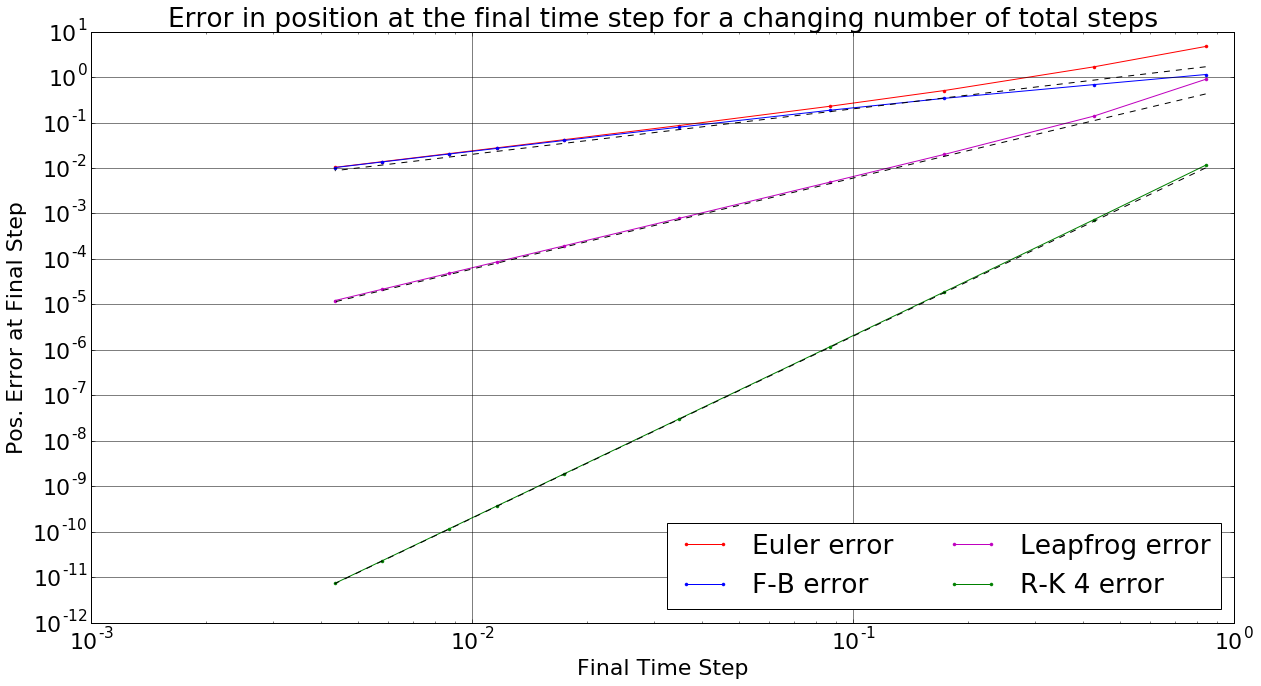

In [502]:
#### Lines of gradient 1,2,4
lnOneArr,lnTwoArr,lnFourArr = np.zeros(len(stepArr)),np.zeros(len(stepArr)),np.zeros(len(stepArr))
for x in range(len(stepArr)):
    lnOneArr[x] = 2*(stepArr[x]**1)
    lnTwoArr[x] = 0.6*(stepArr[x]**2)
    lnFourArr[x] = 0.02*(stepArr[x]**4)
print(lnOneArr,lnTwoArr,lnFourArr)
    
#### Log Log Comparison for differnt time steps

figF, axF = plt.subplots(figsize=(18,10)) 
axF.loglog(stepArr,eulerArr,'r.-',label='Euler error')
axF.loglog(stepArr,fbArr,'b.-',label='F-B error')
axF.loglog(stepArr,lfArr,'m.-',label='Leapfrog error')
axF.loglog(stepArr,rkArr,'g.-',label='R-K 4 error')
axF.loglog(stepArr,lnOneArr,'k--')
axF.loglog(stepArr,lnTwoArr,'k--')
axF.loglog(stepArr,lnFourArr,'k--')
axF.grid(b=True, which='major',color='k',linestyle='-')
#axF.grid(b=True, which='minor',color='k',linestyle='-')
axF.set_title('Error in position at the final time step for a changing number of total steps')
axF.legend(loc=0,ncol=2)
axF.set_xlabel('Final Time Step')
axF.set_ylabel('Pos. Error at Final Step')
figF.tight_layout()
figF.savefig('Scheme Comparison - Changing Intial Time Stepping Conditions.png')

### Comparison at same time step

#figF, axF = plt.subplots(figsize=(18,10)) 
#axF.semilogy(plotT,eulerArr,'r.-',label='Euler error')
#axF.semilogy(plotT,fbArr,'b.-',label='F-B error')
#axF.semilogy(plotT,lfArr,'m.-',label='Leapfrog error')
#axF.semilogy(plotT,rkArr,'g.-',label='R-K 4 error')
#axF.legend(loc=4,ncol=2)
#axF.set_xlim(0,2*math.pi)
#axF.set_ylim(-1,7.1)
#axF.set_xlabel('Time')
#axF.set_ylabel('Positional Error')
#axF.set_title('Error in position with increasing time with the same initial conditions')
#figF.tight_layout()
#figF.savefig('Variable Scheme Comparison - Same conditions.png')

In [503]:
slope, intercept = np.polyfit(np.log(stepArr[4:]),np.log(eulerArr[4:]), 1)
print('Euler Slope shoule be ~ 1')
print('Euler Slope:',slope)
slope, intercept = np.polyfit(np.log(stepArr[4:]), np.log(fbArr[4:]), 1)
print('Forwards-Backwards Slope shoule be ~ 1')
print('Forwards-Backwards Slope:',slope)
slope, intercept = np.polyfit(np.log(stepArr[4:]), np.log(lfArr[4:]), 1)
print('Leapfrog Slope shoule be ~ 2')
print('Leapfrog Slope:',slope)
slope, intercept = np.polyfit(np.log(stepArr[4:]), np.log(rkArr[4:]), 1)
print('Runge-Kutta Slope shoule be ~ 4')
print('Runge-Kutta Slope:',slope)

Euler Slope shoule be ~ 1
Euler Slope: 1.01741466686
Forwards-Backwards Slope shoule be ~ 1
Forwards-Backwards Slope: 0.983993044004
Leapfrog Slope shoule be ~ 2
Leapfrog Slope: 2.00149034964
Runge-Kutta Slope shoule be ~ 4
Runge-Kutta Slope: 4.00235313444


# Initial dt = 0.001

# Slopes from 10 diff time step multipliers, with the same end time (to 6 d.p)

| Scheme | Order |Slope |
| --- | --- | --- |
| Euler Forwards | $1^{st}$ | 1.10439977971 |
| Forwards-Backwards | $1^{st}$ | 1.09685863922 |
| Leapfrog | $2^{nd}$ | 2.18334781065 |
| Runge-Kutta (4-Step) | $4^{th}$ | 4.09812632052 |

Using the same total number of time step intervals as the constant time step case for comparison

# Slopes excluding the run with the final time steps > 0.5

| Scheme | Order |Slope |
| --- | --- | --- |
| Euler Forwards | $1^{st}$ | 1.04053670263 |
| Forwards-Backwards | $1^{st}$ | 0.918643001851 |
| Leapfrog | $2^{nd}$ | 2.00613178339 |
| Runge-Kutta (4-Step) | $4^{th}$ | 3.9923726076 |



### Final Errors for Each Time Step

| Scheme \/ No. Steps >| 10 | 20 | 50 | 100 |  250 | 500 | 750 | 1000 | 1500 | 2000 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Euler Forwards | 9.5 | 7.6 | 2.3 | 0.78 | 0.21 | 0.084 | 0.049 | 0.033 | 0.019 | 0.013 |
| Forwards-Backwards | 22 | 5.2 | 0.88 | 0.46 | 0.18 | 0.077 | 0.047 | 0.032 | 0.019 | 0.013 |
| Leapfrog | 16 | 8.1 | 0.45 | 0.065 | 0.0065 | 0.0011 | 0.00038 | 0.00017 | 0.000056 | 0.000025 |
| Runge-Kutta (4-Step) | 5.2 | 0.34 | 0.0055 | 0.00021 | 0.0000023 | 0.000000068 | 0.000000008 | 0.0000000017 | 0.00000000017 | 0.000000000033 |

### Notes:


# Initial dt = 0.0001

# Slopes from 10 diff time step multipliers, with the same end time (to 6 d.p)

| Scheme | Order |Slope |
| --- | --- | --- |
| Euler Forwards | $1^{st}$ | 1.11752637296 |
| Forwards-Backwards | $1^{st}$ | 1.15608621762 |
| Leapfrog | $2^{nd}$ | 2.10414123515 |
| Runge-Kutta (4-Step) | $4^{th}$ | 4.15058251217 |

Using the same total number of time step intervals as the constant time step case for comparison

# Slopes excluding the run with the final time steps > 0.5

| Scheme | Order |Slope |
| --- | --- | --- |
| Euler Forwards | $1^{st}$ | 1.05562590246 |
| Forwards-Backwards | $1^{st}$ | 0.953246698704 |
| Leapfrog | $2^{nd}$ | 2.01564302054 |
| Runge-Kutta (4-Step) | $4^{th}$ | 4.01894852695 |



### Final Errors for Each Time Step

| Scheme \/ No. Steps >| 10 | 20 | 50 | 100 |  250 | 500 | 750 | 1000 | 1500 | 2000 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Euler Forwards | 9.1 | 8.8 | 3.5 | 1.3 | 0.35 | 0.14 | 0.086 | 0.061 | 0.037 | 0.026 |
| Forwards-Backwards | 26 | 9.7 | 1.2 | 0.61 | 0.26 | 0.13 | 0.080 | 0.057 | 0.035 | 0.025 |
| Leapfrog | 3.2 | 22 | 1.1 | 0.15 | 0.016 | 0.0031 | 0.0012 | 0.00060 | 0.00023 | 0.00011 |
| Runge-Kutta (4-Step) | 10 | 0.91 | 0.020 | 0.00090 | 0.000014 | 0.00000055 | 0.000000081 | 0.000000020 | 0.0000000029 | 0.00000000070 |

### Notes:
